# Measuring stress likelihood by syllable in sonnets

In [1]:
# !pip install -r ../requirements.txt
import sys
sys.path.append('../')
from generative_formalism import *

In [17]:
# Docs
documentation(get_sonnet_rhythm_data)

# Run
df_rhythm = get_sonnet_rhythm_data(
    sample_by='sonnet_period',
    as_in_paper=True,
    as_replicated=False,
    force=False,
    verbose=True,
    collapse_C17_19=True,
)

describe_qual(df_rhythm.group, name='groups by line count')

# Display
df_rhythm

##### `get_sonnet_rhythm_data`

```md
Get combined rhythm analysis data for sonnets from multiple sources.

    Collects and combines rhythm measurements for sonnets from three main sources:
    1. Chadwyck corpus sonnets (historical periods C17-19 and C20)
    2. Shakespeare's 154 sonnets
    3. GenAI-generated sonnets

    The function retrieves rhythm measurements for each source, adds period
    labels, and combines them into a single DataFrame for comparative analysis.
    Results are filtered to sonnets with 10-12 syllables per line.

    Returns
    -------
    pd.DataFrame
        Combined rhythm data with columns including:
        - Rhythm measurements (from get_rhythm_for_* functions)
        - group : str, period label ("C17-19", "C20", "Shakespeare", "GenAI")
        - source : str, data source ("chadwyck", "shakespeare", "genai")
        - Additional metadata from original datasets
        Filtered to sonnets with 10-12 syllables per line.

    Calls
    -----
    - get_chadwyck_corpus_sampled_by(sample_by)
    - get_rhythm_for_sample(df_smpl)
    - get_rhythm_for_shakespeare_sonnets()
    - get_genai_rhyme_promptings_as_in_paper()
    - get_rhythm_for_sample(df_genai_sonnets, gen=False)
    
```
----


* Loading sonnet rhythm data from {PATH_REPO}/data/data_as_in_paper/sonnet_rhythm_data_by_sonnet_period.csv.gz
* Breakdown for groups by line count
C17-19         10763
GenAI           5376
Shakespeare     1980
C20             1831



,stanza_num,line_num,line_txt,linepart_num,parse_rank,parse_txt,is_iambic_pentameter,is_unambigously_iambic_pentameter,syll01_stress,syll02_stress,...,year,num_lines,volume,line,rhyme,genre,period,txt,group,source
id,,,,,,,,,,,,,,,,,,,,,
english/smithcha/Z300489005,1,1,"Mute is thy wild harp, now, O Bard sublime!",1,1,MUTE is.thy WILD harp NOW o BARD su BLIME,0,0,1,0,...,1779.0,14.0,Elegiac sonnets (1797–1800),"&indent;Who, amid Scotia's mountain solitude,",y,Sonnet,1700-1750,"Mute is thy wild harp, now, O Bard sublime!\n ...",C17-19,chadwyck
english/smithcha/Z300489005,1,2,"Who, amid Scotia's mountain solitude,",4,1,WHO a MID.SCO tia's MOUN tain SO li TUDE,0,0,1,0,...,1779.0,14.0,Elegiac sonnets (1797–1800),"&indent;Who, amid Scotia's mountain solitude,",y,Sonnet,1700-1750,"Mute is thy wild harp, now, O Bard sublime!\n ...",C17-19,chadwyck
english/smithcha/Z300489005,1,3,"Great Nature taught to ""built the lofty rhyme,""",6,1,great NA ture TAUGHT to BUILT the LOF ty RHYME,1,0,1,1,...,1779.0,14.0,Elegiac sonnets (1797–1800),"&indent;Who, amid Scotia's mountain solitude,",y,Sonnet,1700-1750,"Mute is thy wild harp, now, O Bard sublime!\n ...",C17-19,chadwyck
english/smithcha/Z300489005,1,4,"And even beneath the daily pressure, rude,",9,1,and E ven.be NEATH the DAI ly PRES sure RUDE,0,0,0,1,...,1779.0,14.0,Elegiac sonnets (1797–1800),"&indent;Who, amid Scotia's mountain solitude,",y,Sonnet,1700-1750,"Mute is thy wild harp, now, O Bard sublime!\n ...",C17-19,chadwyck
english/smithcha/Z300489005,1,5,"Of labouring Poverty, thy generous blood,",11,1,of LA bou.ring PO ver TY thy GE ne.rous BLOOD,0,0,0,1,...,1779.0,14.0,Elegiac sonnets (1797–1800),"&indent;Who, amid Scotia's mountain solitude,",y,Sonnet,1700-1750,"Mute is thy wild harp, now, O Bard sublime!\n ...",C17-19,chadwyck
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98719b6a,3,10,"For in thine heart, a virtue doth take place,",18,1,for IN thine HEART a VIR tue DOTH take PLACE,1,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GenAI,genai
98719b6a,3,11,"A kindness that doth shine with gentle might,",20,1,a KIN dness THAT doth SHINE with GEN tle MIGHT,1,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GenAI,genai
98719b6a,3,12,"And in thine eyes, a love that doth ignite.",21,1,and IN thine EYES a LOVE that DOTH i GNITE,1,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GenAI,genai


In [19]:
df_rhythm.group.value_counts()


group
C17-19         10763
GenAI           5376
Shakespeare     1980
C20             1831
Name: count, dtype: int64

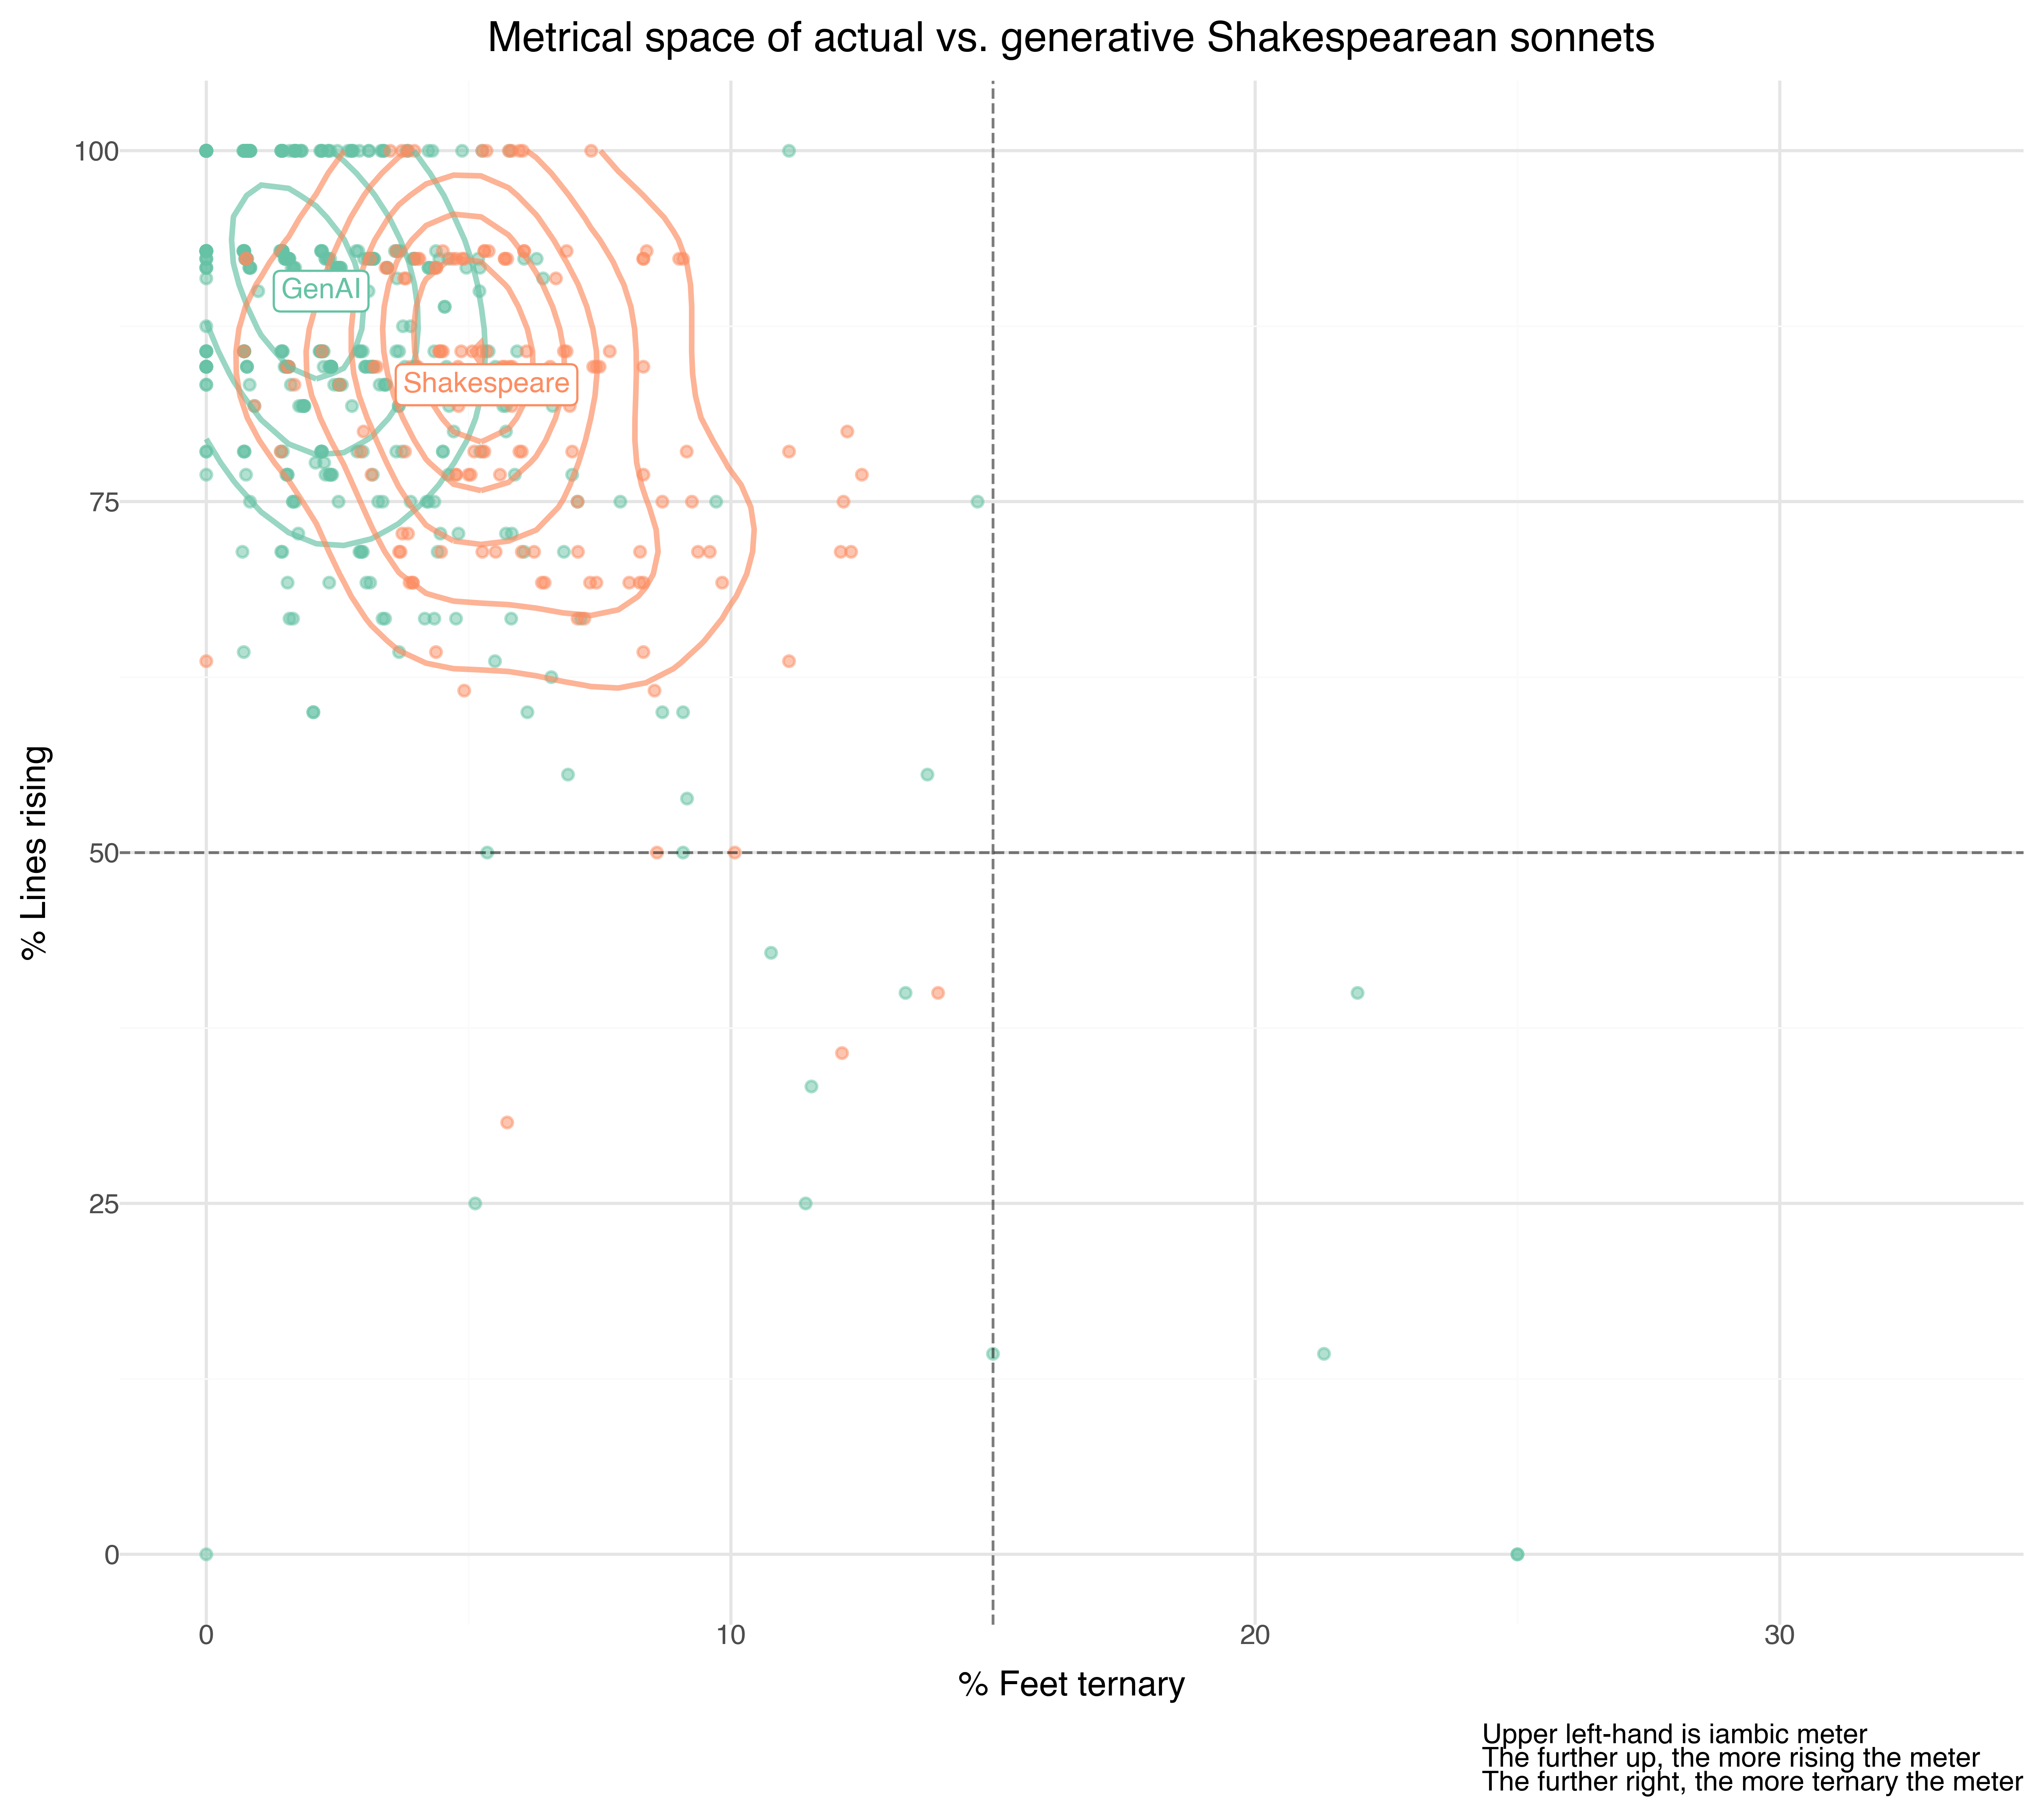

In [ ]:
def plot_metrical_space(df_rhythm):
    p9.options.figure_size = (9, 8)
    p9.options.dpi = 300
    figdf = df_rhythm.groupby(['group','id']).mean(numeric_only=True).reset_index()
    figdf['perc_ww_in_meter'] = figdf['num_pos_ww']/figdf['num_pos']

    figdf = figdf[~figdf.group.str.startswith('C')]
    xcol = 'perc_ww_in_meter'
    ycol = 'forth_syllable_stressed'
    figdf[xcol]*=100
    figdf[ycol]*=100

    title='Upper left-hand is iambic meter'
    title+='\nThe further up, the more rising the meter'
    title+='\nThe further right, the more ternary the meter'
    fig = (
        p9.ggplot(figdf, p9.aes(x=xcol, y=ycol, color='group', label='group'))
        + p9.geom_point(size=1.5, alpha=.5)
        + p9.geom_density_2d(size=1, alpha=.666)
        + p9.geom_label(size=9, data=figdf.groupby(['group']).median(numeric_only=True).reset_index())
        # + p9.facet_wrap('agent',ncol=2)
        # + p9.facet_wrap('agent',nrow=1)
        + p9.theme_minimal()
        + p9.theme(legend_position='none')
        + p9.scale_color_brewer(type='qual', palette='Set2')
        + p9.scale_x_continuous(limits=(0,33))
        + p9.scale_y_continuous(limits=(0,100))
        + p9.labs(y='% Lines rising', x='% Feet ternary', caption=title, title='Metrical space of actual vs. generative Shakespearean sonnets')
        + p9.geom_vline(xintercept=15, linetype='dashed', alpha=0.5)
        + p9.geom_hline(yintercept=50, linetype='dashed', alpha=0.5)
    )
    # fig.save('../../generative-humanities/Figures/HoodSpace2.png')
    return fig


plot_metrical_space(df_rhythm)

In [ ]:
df_rhythm['perc_ww_in_meter'] = df_rhythm['num_pos_ww']/df_rhythm['num_pos']
df_stats = compute_stat_signif(
    df_rhythm,
    'group',
    'perc_ww_in_meter'
)
df_stats

Computing comparisons for Shakespeare vs GenAI: 100%|██████████| 6/6 [00:05<00:00,  1.13it/s] 


,comparison,n1,n2,p_value,effect_size,effect_size_str,mean1,mean2,significant,group
4,C20 vs GenAI,1831,5376,0.0000,0.583172,medium,0.069417,0.027277,True,GenAI
5,Shakespeare vs GenAI,1980,5376,0.0000,0.518646,medium,0.064652,0.027277,True,GenAI
2,C17-19 vs GenAI,10763,5376,0.0000,0.327241,small,0.050503,0.027277,True,GenAI
0,C17-19 vs C20,10763,1831,0.0000,0.246284,small,0.050503,0.069417,True,C20
1,C17-19 vs Shakespeare,10763,1980,0.0000,0.184621,,0.050503,0.064652,True,Shakespeare
3,C20 vs Shakespeare,1831,1980,0.1053,0.052674,,0.069417,0.064652,False,Shakespeare


In [34]:
df_rhythm['perc_ww_in_meter'] = df_rhythm['num_pos_ww']/df_rhythm['num_pos']
compute_stat_signif(
    df_rhythm,
    'group',
    'forth_syllable_stressed'
)

Computing comparisons for Shakespeare vs GenAI: 100%|██████████| 6/6 [00:05<00:00,  1.08it/s] 


,comparison,n1,n2,p_value,effect_size,effect_size_str,mean1,mean2,significant,group
4,C20 vs GenAI,1831,5376,0.0000,0.450339,small,0.707264,0.872954,True,GenAI
0,C17-19 vs C20,10763,1831,0.0000,0.356083,small,0.842237,0.707264,True,C20
3,C20 vs Shakespeare,1831,1980,0.0000,0.250570,small,0.707264,0.813131,True,Shakespeare
5,Shakespeare vs GenAI,1980,5376,0.0000,0.171281,,0.813131,0.872954,True,GenAI
2,C17-19 vs GenAI,10763,5376,0.0000,0.086682,,0.842237,0.872954,True,GenAI
1,C17-19 vs Shakespeare,10763,1980,0.0017,0.078966,,0.842237,0.813131,True,Shakespeare
